In [ ]:
# Copyright (C) 2021 by Dmitry Semenov <dmitry.semenov@uef.fi>
#
# Permission to use, copy, modify, and/or distribute this software for any
# purpose with or without fee is hereby granted.
#
# THE SOFTWARE IS PROVIDED "AS IS" AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH
# REGARD TO THIS SOFTWARE INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY
# AND FITNESS. IN NO EVENT SHALL THE AUTHOR BE LIABLE FOR ANY SPECIAL, DIRECT,
# INDIRECT, OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM
# LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR
# OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR
# PERFORMANCE OF THIS SOFTWARE.

In [1]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Write something

**readDir()** function reads the 'dir_path'and returns:
'object_raw' - object raw file path

1.   'object_raw' - object raw file path
2.   'object_hdr' - object hdr file path
3.   'white_raw'  - white raw file path
4.   'white_hdr'  - white hdr file path
5.  'dark_raw'   - dark raw file path
6.  'dark_hdr'   - dark hdr file path

**read_hdr()** reads hdr file content and returns:
1. samples
2. bands
3. lines
4. waves - and array of wavelengths from hdr file. Size of bands.

In [2]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
import os
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr
import os
import numpy

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves
    print(samples, lines, bands)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    print(n1)
    print(n2)
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1

    return samples, bands, lines, waves




'path' is a path to 'capture' folder
the code reads 'spectral_image'

In [3]:
# Read hdr
path = "/content/drive/MyDrive/Colab Notebooks/SUMMER SCHOOL 2021_/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture"

[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
samples = 512
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)

/content/drive/MyDrive/Colab Notebooks/SUMMER SCHOOL 2021_/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/Colorchecker.raw
2144
2144 1357 135
54
55
190
spectral_image.shape:  (1357, 135, 2144)


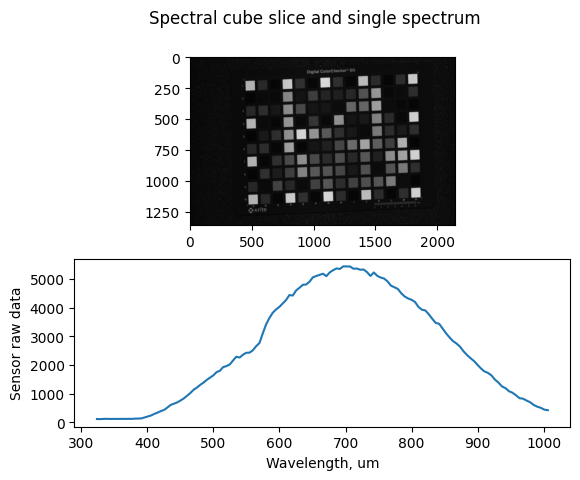

In [4]:
# Plot picture and spectrum
fig, axs = plt.subplots(2)
fig.suptitle('Spectral cube slice and single spectrum')
axs[0].imshow(spectral_image[:,50,:], cmap="gray", vmin=0, vmax=40700)#
axs[1].plot(waves, spectral_image[100,:,100])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')
plt.rcParams['figure.dpi'] = 300
plt.show()

White correction
Read White and Dark

/content/drive/MyDrive/Colab Notebooks/SUMMER SCHOOL 2021_/Lectures+Exercises/LectureExercise #7.2, White correction/Spectral files/ColorChecker_8_binning/capture/white.hdr
2144
2144 234 135
54
55
190
2144 135 234


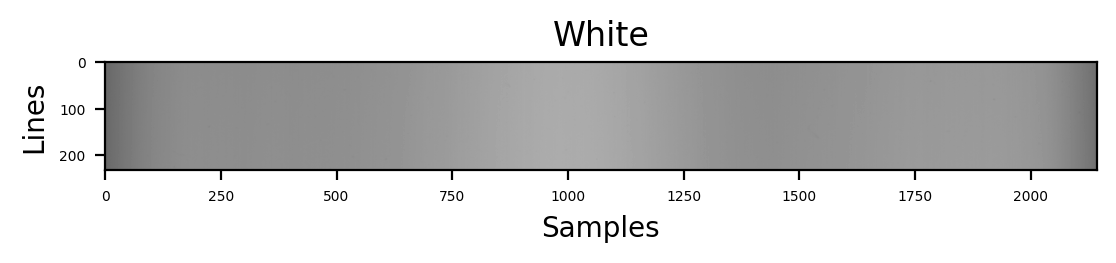

2144
2144 100 135
54
55
190


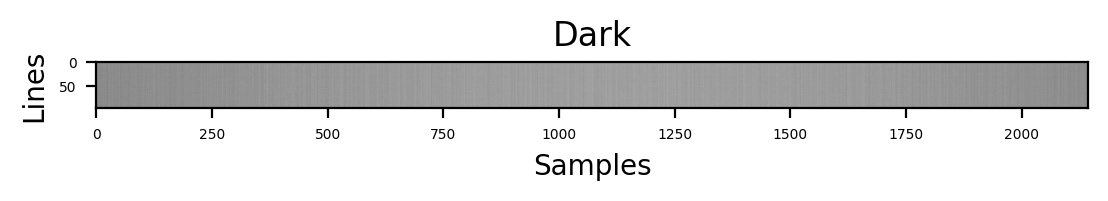

In [5]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,100,:], cmap="gray", vmin=0, vmax=250)#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,100,:], cmap="gray", vmin=0, vmax=2)#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


In [6]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av)
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av)
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube


(1357, 135, 2144)


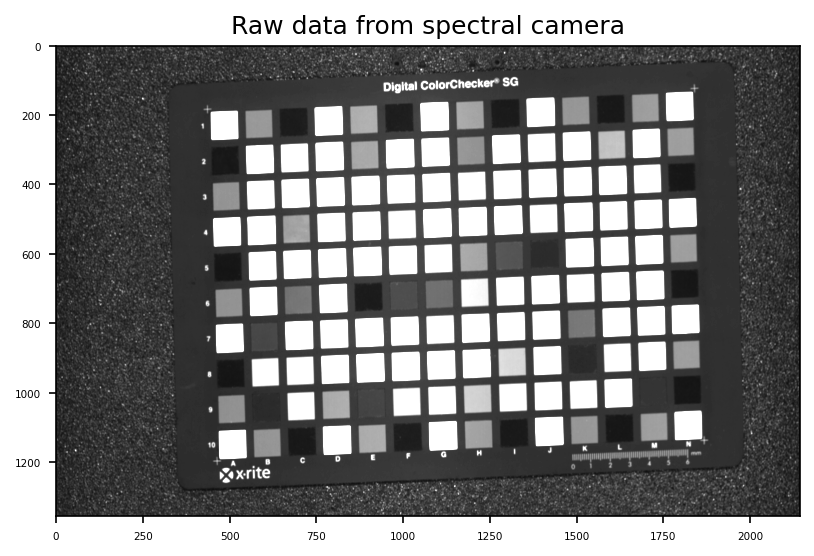

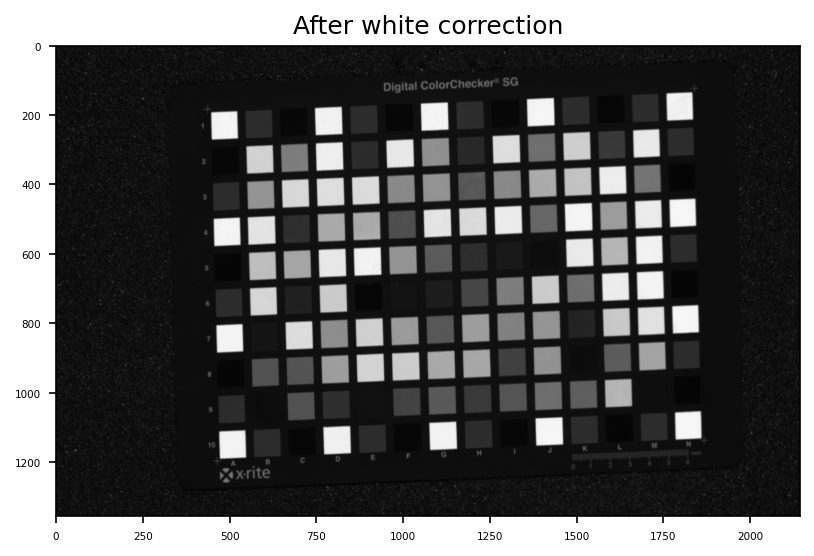

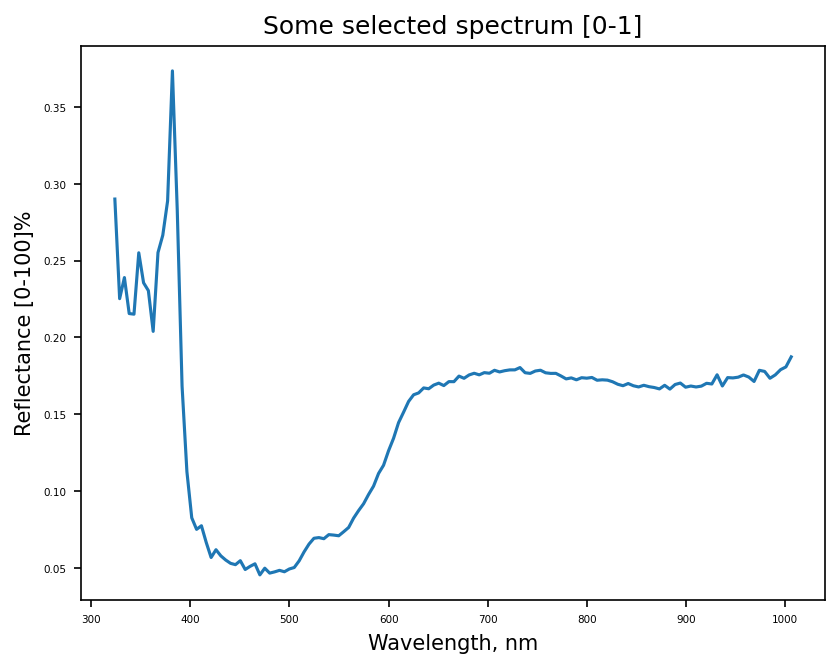

In [7]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,100,:], cmap="gray", vmin=0, vmax=10050)#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,100,:], cmap="gray", vmin=0, vmax= 1)#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves, spectral_cube[300,:,900])#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()



645.55
529.72
435.69


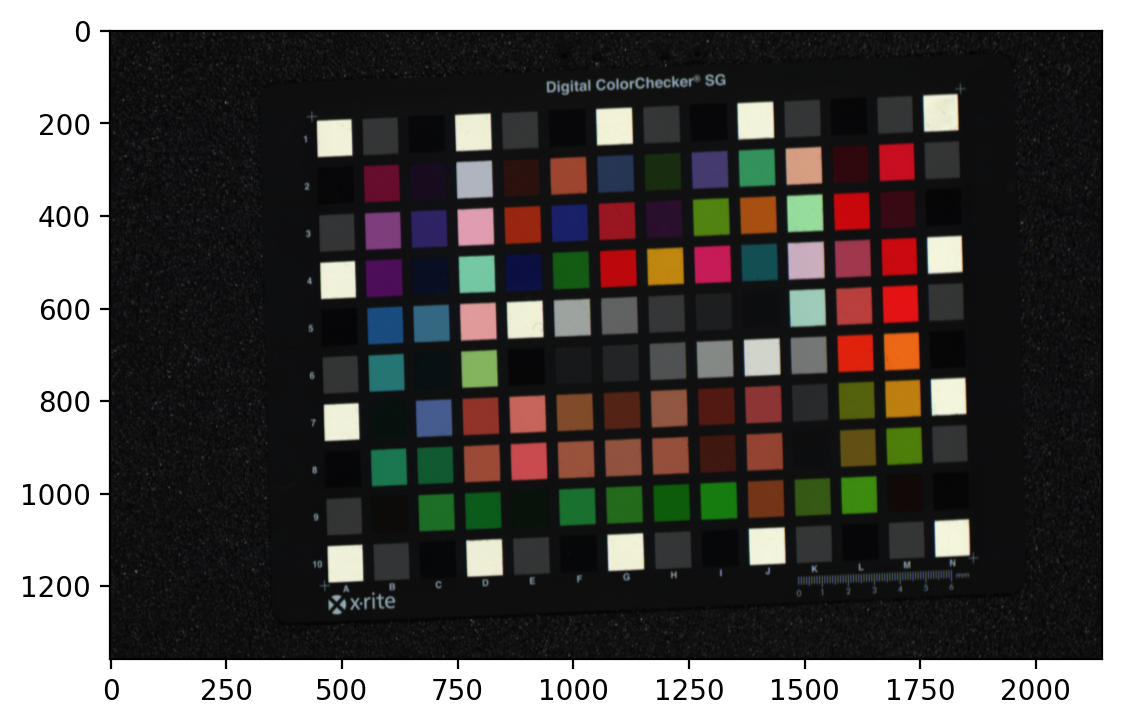

In [8]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 65
ch_2 = 42
ch_3 = 23
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()

[0.11179102 0.10695896 0.15236154]


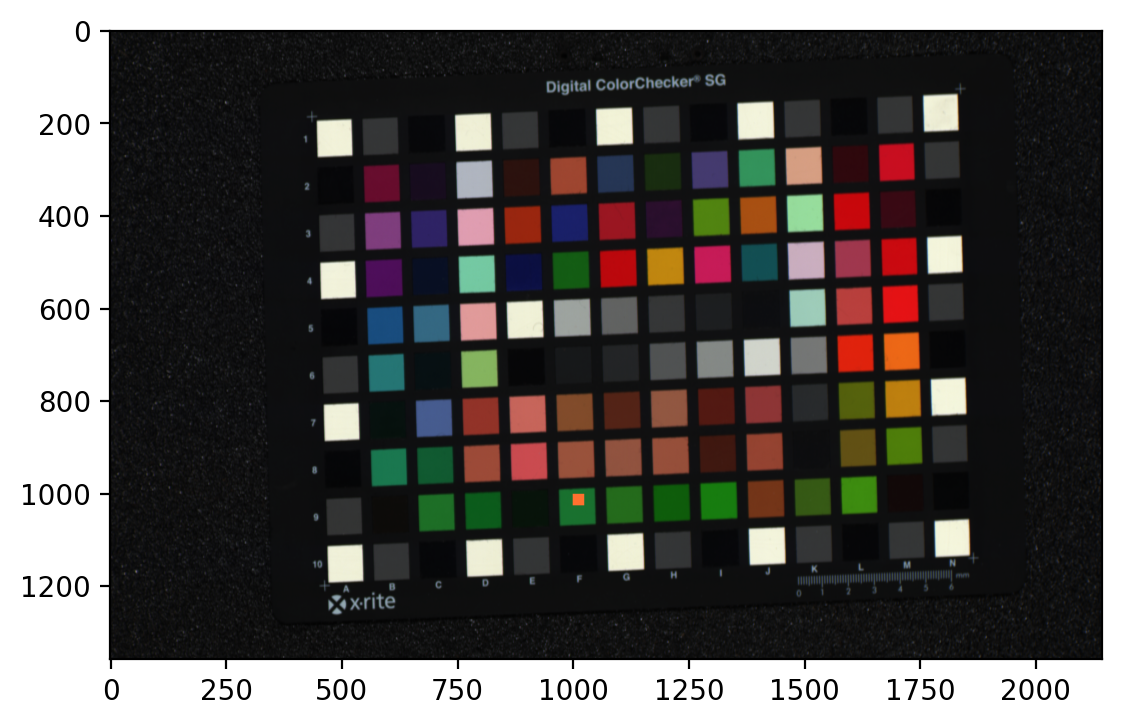

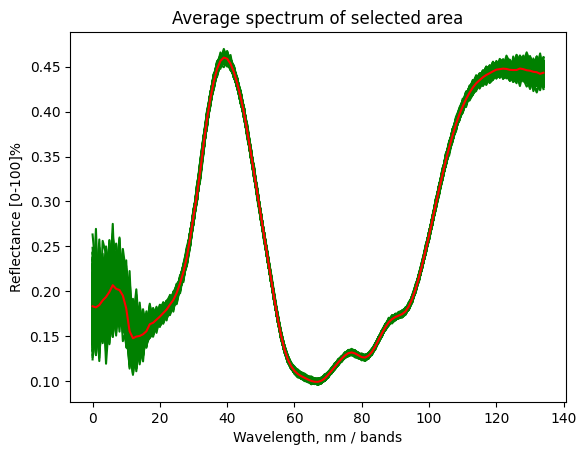

In [9]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select plastic leaf
'''
# ----- Red ----
x1 = 525
x2 = 550
y1 = 1100
y2 = 1125
'''
# ----- Green ----
x1 = 1000
x2 = 1025
y1 = 1000
y2 = 1025
'''
# ----- Bezhe ----
x1 = 925
x2 = 950
y1 = 1000
y2 = 1025
'''
plt.rcParams['figure.dpi'] = 200

RGB2[x1:x2,y1:y2,0] = 255
sel = spectral_cube[x1:x2,:,y1:y2]
#print(spectral_cube.shape)
#print(plastic.shape)

sel1 = numpy.sum(sel, axis = 0)
#print(pl1.shape)
selection1 = numpy.sum(sel1, axis =1)/((x2-x1)*(y2-y1))
#print(pl2.shape)

##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 100
plt.show()

for i in range(20):
  plt.plot(sel[i,:,], 'g') #plt.plot(waves,selection1)

plt.plot(selection1, 'r') #plt.plot(waves,selection1)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.title("Average spectrum of selected area")


plt.show()
# save
saveraw = "/content/drive/MyDrive/mushrom_image0001.raw"
fileobj = open(saveraw, mode='wb')
selection1.tofile(fileobj)
fileobj.close()
# save to text or Excel file x1 = 1000, x2 = 1025, y1 = 1000 , y2 = 1025



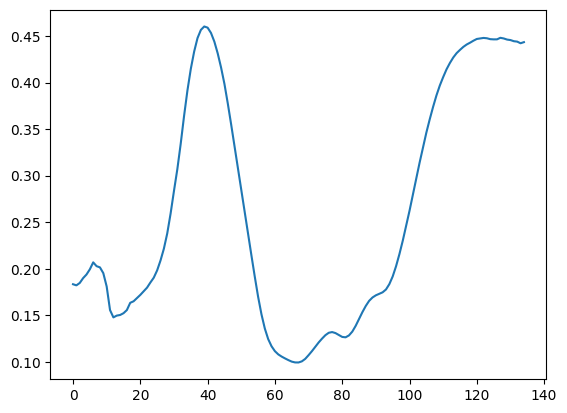

In [10]:
open_path = "/content/drive/MyDrive/mushrom_image0001.raw"
fopen = open(open_path, "rb")
mushroom = numpy.fromfile(fopen, dtype=numpy.float32)
fopen.close()
plt.plot(mushroom)
plt.show()

1357 135 2144
20
42
80
90
110
RGB:  (1357, 2144, 3)
cube:  (1357, 135, 2144)
small cube:  (1357, 2144, 5)
0.98120683
0.94134045
0.9776863


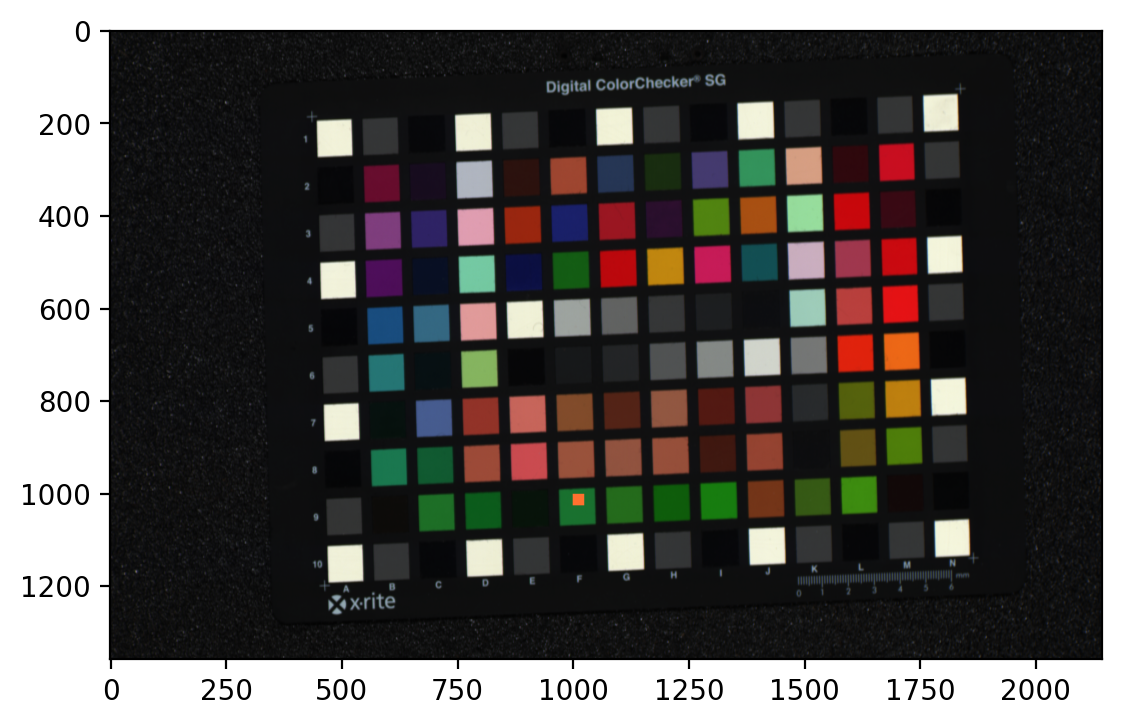

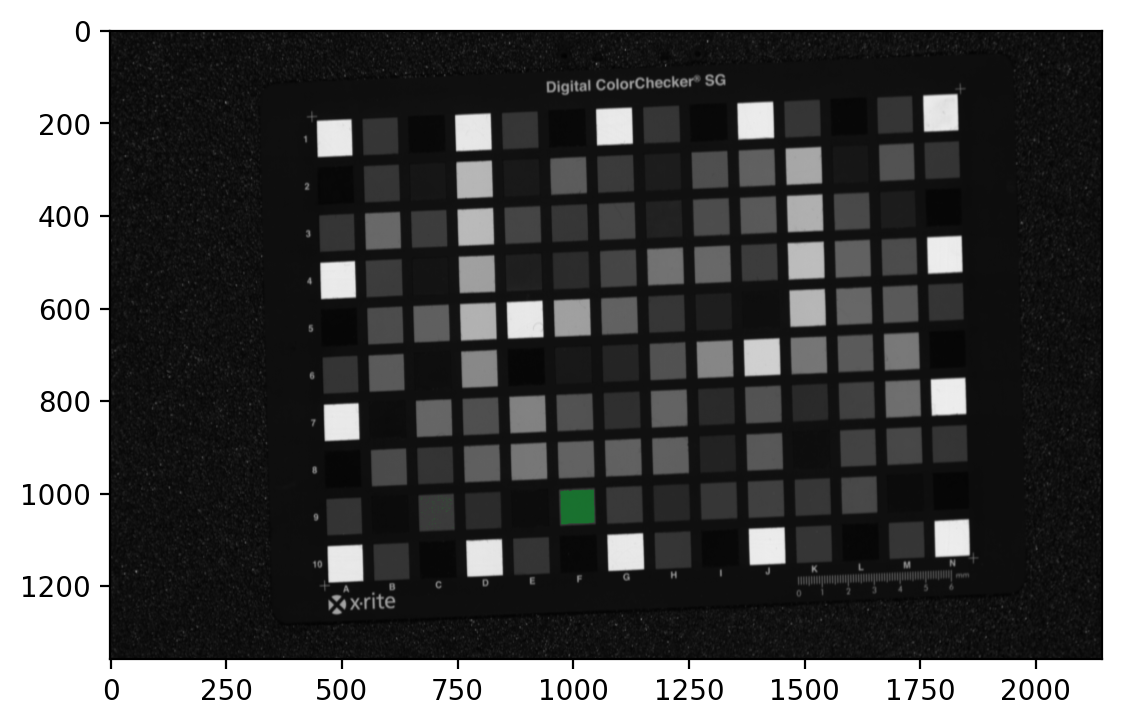

In [13]:
# Generate Band based condition
# use Green
n = 5 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 20
bbands[1] = 42
bbands[2] = 80
bbands[3] = 90
bbands[4] = 110
# Read selected spectrum, ploted and saved in prevous code section
open_path = "/content/drive/MyDrive/mushrom_image0001.raw"
fopen = open(open_path, "rb")
selected = numpy.fromfile(fopen, dtype=numpy.float32)
fopen.close()
###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n-1) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n-1):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(s1):  #s1
  for j in range(s3): #s3
    criteria = 0
    for ch in range(n-1):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.02: #[0.02 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=gray_color
        mask[i,j,1]=gray_color
        mask[i,j,2]=gray_color
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 200
plt.imshow(mask)

plt.show()

1357 135 2144
20
42
80
120
RGB:  (1357, 2144, 3)
cube:  (1357, 135, 2144)
small cube:  (1357, 2144, 4)


0.9776863
0.9776863
0.9776863


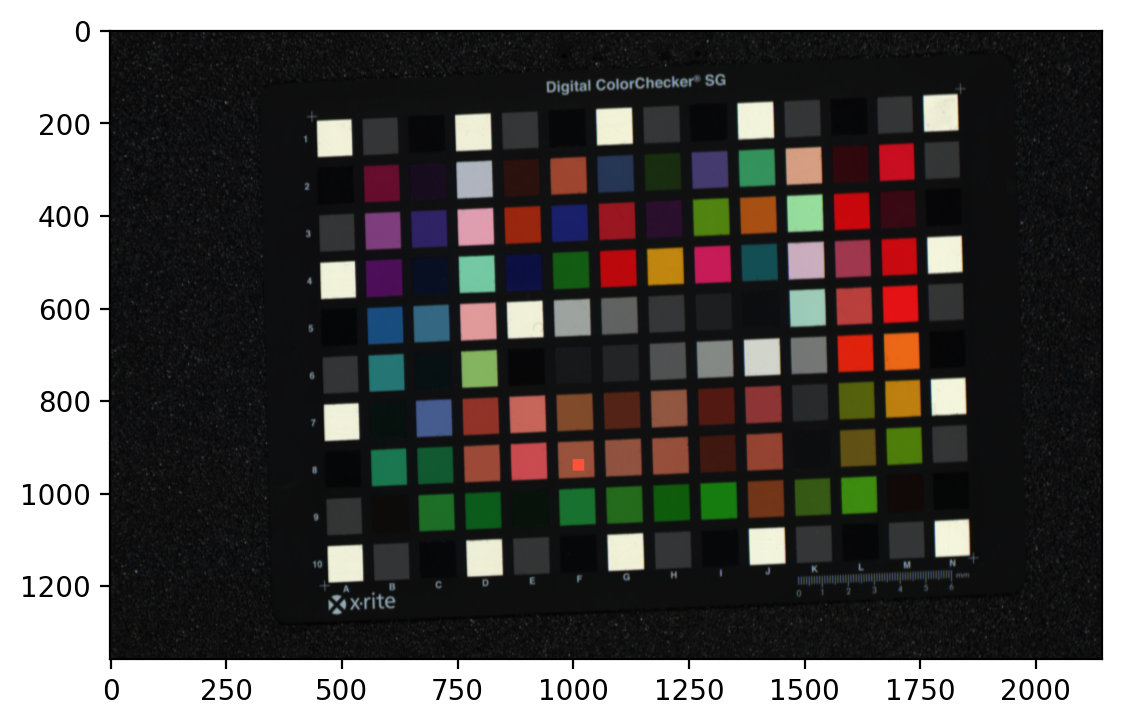

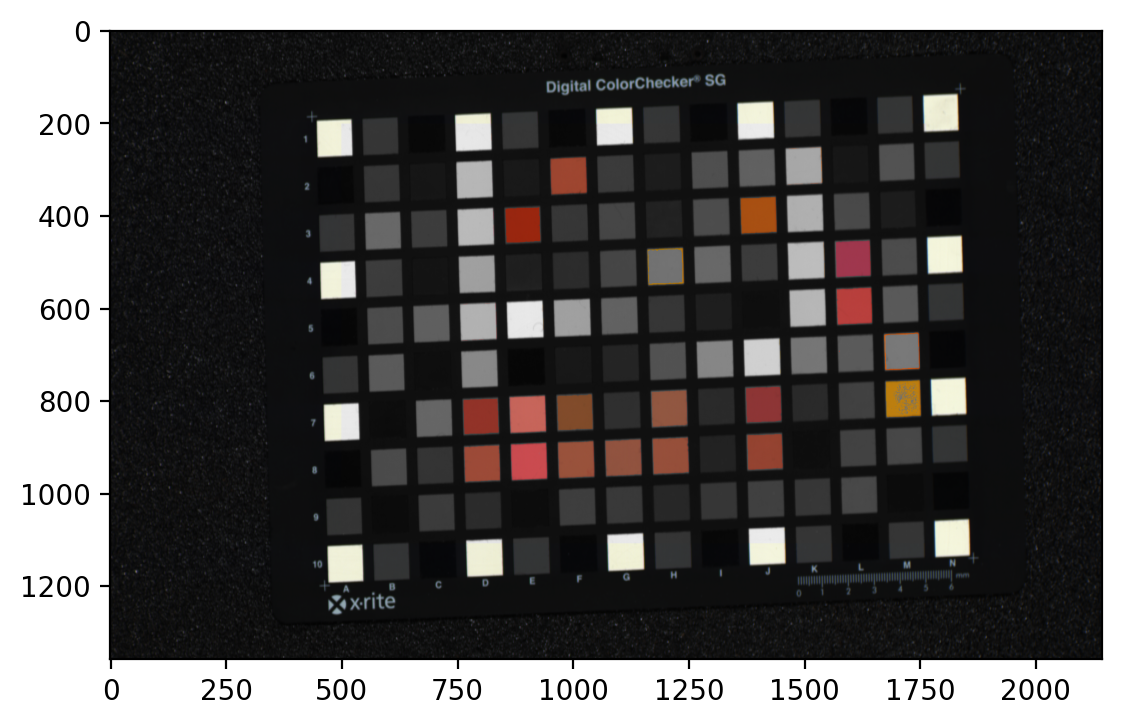

In [ ]:
# Generate Band based condition
# use Bezhe
n = 4 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 20
bbands[1] = 42
bbands[2] = 80
bbands[3] = 120
# Read selected spectrum, ploted and saved in prevous code section
open_path = "/content/drive/MyDrive/mushrom_image0001.raw"
fopen = open(open_path, "rb")
selected = numpy.fromfile(fopen, dtype=numpy.float32)
fopen.close()
###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n-1) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n-1):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(0+200,s1-250):  #s1
  for j in range(0+500,s3-380): #s3
    criteria = 0
    for ch in range(n-1):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.18: #[0.02 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=gray_color
        mask[i,j,1]=gray_color
        mask[i,j,2]=gray_color
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 200
plt.imshow(mask)

plt.show()

1357 135 2144
20
42
80
120
RGB:  (1357, 2144, 3)
cube:  (1357, 135, 2144)
small cube:  (1357, 2144, 4)


0.9776863
0.9776863
0.9776863


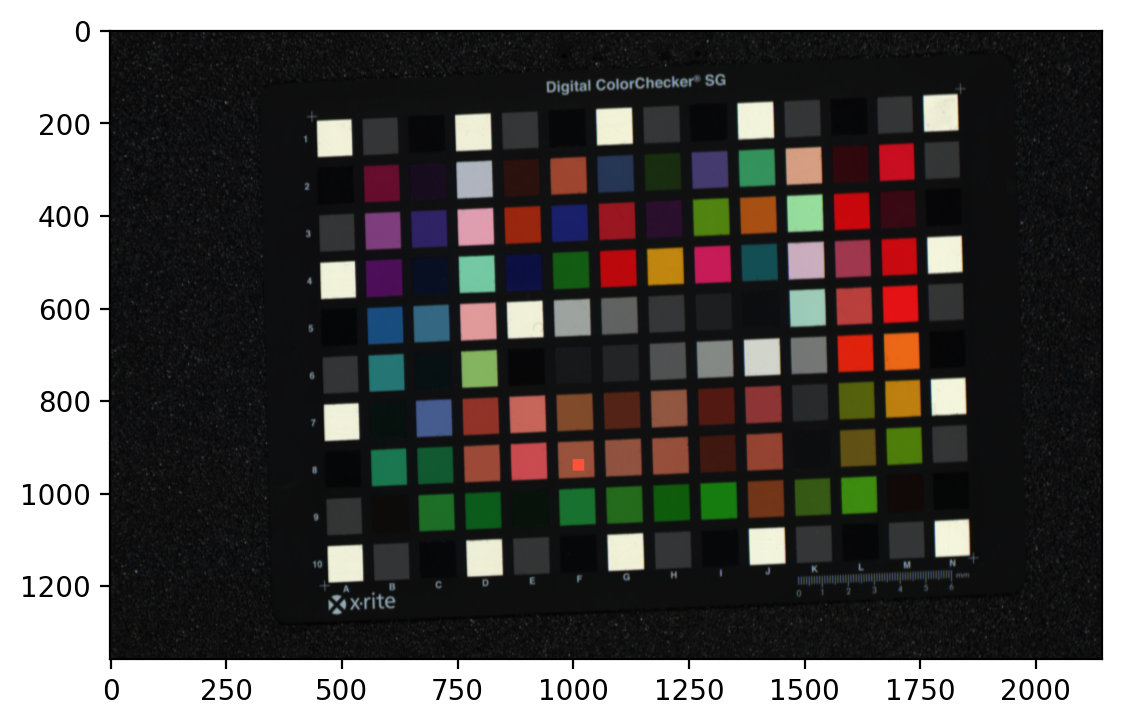

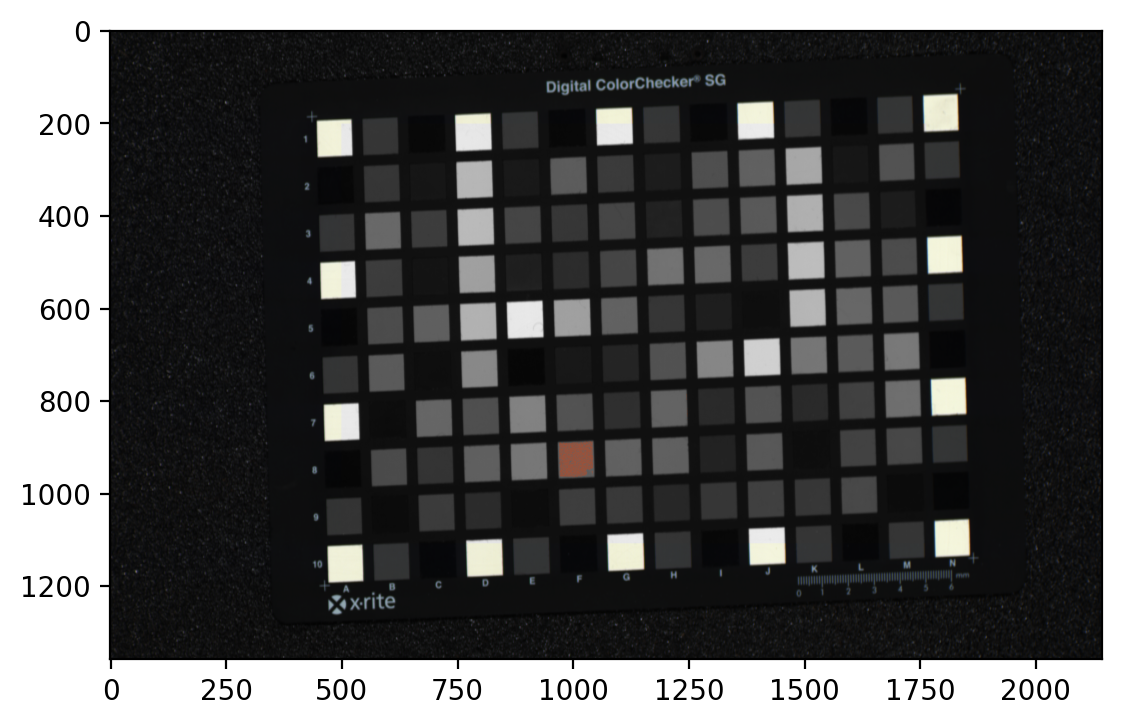

In [ ]:
# RATIO

# Generate Band based condition based on ratio
n = 4 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 20
bbands[1] = 42
bbands[2] = 80
bbands[3] = 120
# Read selected spectrum, ploted and saved in prevous code section
open_path = "/content/drive/MyDrive/mushrom_image0001.raw"
fopen = open(open_path, "rb")
selected = numpy.fromfile(fopen, dtype=numpy.float32)
fopen.close()
###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n-1) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n-1):
  ratio[i] = selected[bbands[i+1]]/selected[bbands[i]]
  #print(bbands[i], '  ', bbands[i+1])
  #print('ratio:', ratio[i], '   ',selected[bbands[i+1]]/selected[bbands[i]])
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
#mask = numpy.zeros((lines, samples, 3), dtype=numpy.float32)
#print('mask: ',mask.shape)
#mask[:,:,0] = small_spectral_cube[:,:,2]
#mask[:,:,1] = small_spectral_cube[:,:,1]
#mask[:,:,2] = small_spectral_cube[:,:,0]
mask = RGB.copy()

for i in range(0+200,s1-250):  #s1
  for j in range(0+500,s3-380): #s3
    criteria = 0
    for ch in range(n-1):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch+1]/small_spectral_cube[i,j,ch]-ratio[ch]))>0.05: # threshold [0.5 - 2.5]
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=gray_color
        mask[i,j,1]=gray_color
        mask[i,j,2]=gray_color
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 200
plt.imshow(mask)

plt.show()



# New Section